In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch, KMeans 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from itertools import cycle, combinations
from sklearn import metrics
from bokeh.plotting import figure, show, output_file,output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource,Div
from bokeh.layouts import column
from bokeh.palettes import Category20
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset=pd.read_csv('./../data/processed_data/combined_dataset.csv')
dataset=dataset[dataset['Data_Zone'].notna()]
dataset

Data_Zone        Intermediate_Zone       Council_area  Total_population  \
0     S01006506                   Culter      Aberdeen City             904.0   
1     S01006507                   Culter      Aberdeen City             830.0   
2     S01006508                   Culter      Aberdeen City             694.0   
3     S01006509                   Culter      Aberdeen City             573.0   
4     S01006510                   Culter      Aberdeen City             676.0   
...         ...                      ...                ...               ...   
8037  S01010987  Newbattle and Dalhousie         Midlothian             653.0   
8038  S01008512            Craiglockhart  City of Edinburgh             522.0   
8039  S01008537    Comiston and Swanston  City of Edinburgh             659.0   
8040  S01008622           Marchmont West  City of Edinburgh             512.0   
8041  S01010988  Newbattle and Dalhousie         Midlothian             611.0   

      Working_age_population_revised  Income_rate  Income_count  \
0                              605.0         0.07          60.0   
1                              491.0         0.07          60.0   
2                              519.0         0.05          30.0   
3                              354.0         0.05          30.0   
4                              414.0         0.10          70.0   
...                              ...          ...           ...   
8037                           451.0         0.01           5.0   
8038                           320.0         0.00           0.0   
8039                           366.0         0.00           0.0   
8040                           406.0         0.00           0.0   
8041                           416.0         0.00           0.0   

      Employment_rate  Employment_count   CIF  ...      PT_GP    PT_Post  \
0                0.07              40.0    60  ...   8.437832   5.987087   
1                0.05              25.0    40  ...   8.331833   7.262817   
2                0.03              15.0    45  ...   7.853631   5.827924   
3                0.06              20.0    65  ...   7.434491   8.311862   
4                0.07              30.0    75  ...   5.141013   6.627376   
...               ...               ...   ...  ...        ...        ...   
8037             0.02               9.0  55.0  ...  11.889787  18.775646   
8038             0.01               3.0  20.0  ...   7.680317   8.135619   
8039             0.02               6.0  20.0  ...  10.419287   9.911003   
8040             0.00               2.0  25.0  ...   4.719671   6.735116   
8041             0.01               5.0  35.0  ...  13.429099  17.134027   

      PT_retail       crime_count        crime_rate  overcrowded_count  \
0      5.711433  8.00642939150402  88.5666968086728               87.0   
1      6.794300  4.00321469575201  48.2315023584579               85.0   
2      5.251454  4.00321469575201  57.6832088725073               31.0   
3      8.444698                 *                 *               42.0   
4      6.619130   12.009644087256  177.657456912071               50.0   
...         ...               ...               ...                ...   
8037   9.483275                 3                47                5.0   
8038   9.035738                 9               175                6.0   
8039  19.339926                 3                46               15.0   
8040   6.548124                 4                79               81.0   
8041  10.307368                 *                 *               11.0   

     nocentralheat_count overcrowded_rate  nocentralheat_rate  year  
0                   10.0         0.102113            0.011737  2016  
1                    4.0         0.101675            0.004785  2016  
2                    8.0         0.048212            0.012442  2016  
3                    6.0         0.072414            0.010345  2016  
4                    7.0         0.086655            0.012132  2016  
...   

In [3]:
dataset.describe()

Total_population  Working_age_population_revised  Income_rate  \
count       8042.000000                     8042.000000  8040.000000   
mean         773.620617                      500.776424     0.121623   
std          200.509331                      163.736946     0.095424   
min            0.000000                        0.000000     0.000000   
25%          638.000000                      400.000000     0.050000   
50%          758.000000                      479.000000     0.100000   
75%          884.000000                      569.000000     0.180000   
max         3847.000000                     3423.000000     0.730000   

       Income_count  Employment_rate  Employment_count      ALCOHOL  \
count   8042.000000      8040.000000       8042.000000  8042.000000   
mean      92.655558         0.105061         51.381870    99.330153   
std       75.261552         0.079730         41.238569    99.790209   
min        0.000000         0.000000          0.000000     0.000000   
25%       35.000000         0.040000         20.000000    32.799203   
50%       70.000000         0.080000         40.000000    70.165935   
75%      130.000000         0.150000         70.000000   133.146010   
max      555.000000         0.530000        325.000000  2350.544008   

              DRUG          SMR        EMERG  ...  drive_retail  \
count  8042.000000  8042.000000  8042.000000  ...   8042.000000   
mean     95.947311    98.990301    99.007814  ...      5.081690   
std     147.090533    45.677567    34.148308  ...      5.765077   
min       0.000000     0.000000    19.717688  ...      0.685475   
25%       0.000000    70.000000    72.655842  ...      2.777500   
50%      43.320199    92.000000    93.065572  ...      3.946242   
75%     129.245471   120.000000   120.540397  ...      5.730346   
max    1864.126199   950.000000   323.786253  ...    190.000000   

       drive_secondary        PT_GP      PT_Post    PT_retail  \
count      8042.000000  8042.000000  8042.000000  8042.000000   
mean          5.945417    10.046098     8.469875    13.102799   
std           4.896820     5.942590     4.386443    10.127055   
min           1.017791     1.601271     1.930570     1.835432   
25%           3.628994     6.267574     5.568977     7.823843   
50%           4.776938     8.665514     7.465039    10.969180   
75%           6.531299    12.007307    10.139799    15.499208   
max         116.149193   108.789987    40.277934   190.000000   

       overcrowded_count  nocentralheat_count  overcrowded_rate  \
count        8042.000000          8042.000000       8042.000000   
mean           83.870057            13.766600          0.111320   
std            65.128254            17.783708          0.079961   
min             0.000000             0.000000          0.000000   
25%            36.000000             3.000000          0.050000   
50%            68.000000             8.000000          0.093750   
75%           114.000000            17.000000          0.152297   
max           490.000000           187.000000          0.583882   

       nocentralheat_rate         year  
count         8042.000000  8042.000000  
mean             0.018261  2016.530216  
std              0.022527     1.356453  
min              0.000000  2016.000000  
25%              0.004283  2016.000000  
50%              0.010345  2016.000000  
75%              0.023510  2016.000000  
max              0.214964  2020.000000  

[8 rows x 26 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8042 entries, 0 to 8041
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data_Zone                       8042 non-null   object 
 1   Intermediate_Zone               8042 non-null   object 
 2   Council_area                    8042 non-null   object 
 3   Total_population                8042 non-null   float64
 4   Working_age_population_revised  8042 non-null   float64
 5   Income_rate                     8040 non-null   float64
 6   Income_count                    8042 non-null   float64
 7   Employment_rate                 8040 non-null   float64
 8   Employment_count                8042 non-null   float64
 9   CIF                             8042 non-null   object 
 10  ALCOHOL                         8042 non-null   float64
 11  DRUG                            8042 non-null   float64
 12  SMR                             8042 no

In [5]:
dataset.columns

Index(['Data_Zone', 'Intermediate_Zone', 'Council_area', 'Total_population',
       'Working_age_population_revised', 'Income_rate', 'Income_count',
       'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment', 'Noquals',
       'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO', 'drive_primary',
       'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post', 'PT_retail',
       'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheat_count',
       'overcrowded_rate', 'nocentralheat_rate', 'year'],
      dtype='object')

In [6]:
labellist=numeric_cols = dataset.select_dtypes(include=['int', 'float']).columns.tolist()
labellist

['Total_population',
 'Working_age_population_revised',
 'Income_rate',
 'Income_count',
 'Employment_rate',
 'Employment_count',
 'ALCOHOL',
 'DRUG',
 'SMR',
 'EMERG',
 'Noquals',
 'NEET',
 'drive_petrol',
 'drive_GP',
 'drive_PO',
 'drive_primary',
 'drive_retail',
 'drive_secondary',
 'PT_GP',
 'PT_Post',
 'PT_retail',
 'overcrowded_count',
 'nocentralheat_count',
 'overcrowded_rate',
 'nocentralheat_rate',
 'year']

Gaussian Mixture Model Clustering: ALCOHOL DRUG


  File "c:\Users\akars\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


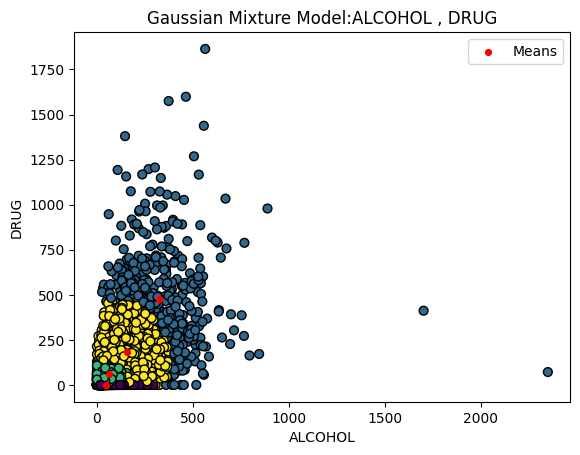

Gaussian Mixture Model Clustering: ALCOHOL EMERG


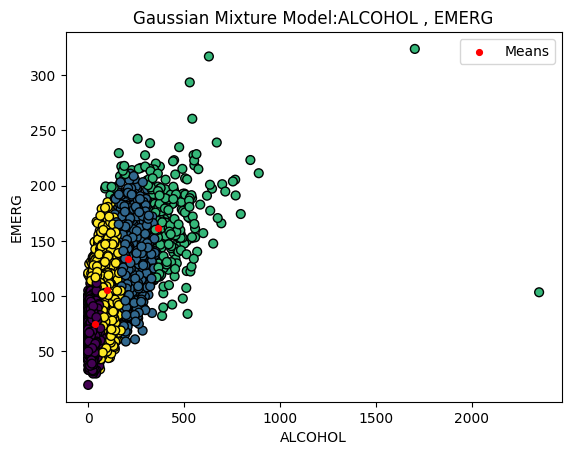

Gaussian Mixture Model Clustering: ALCOHOL overcrowded_rate


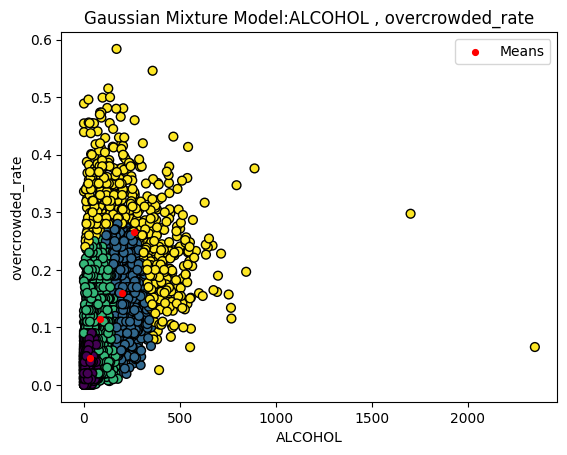

Gaussian Mixture Model Clustering: ALCOHOL nocentralheat_rate


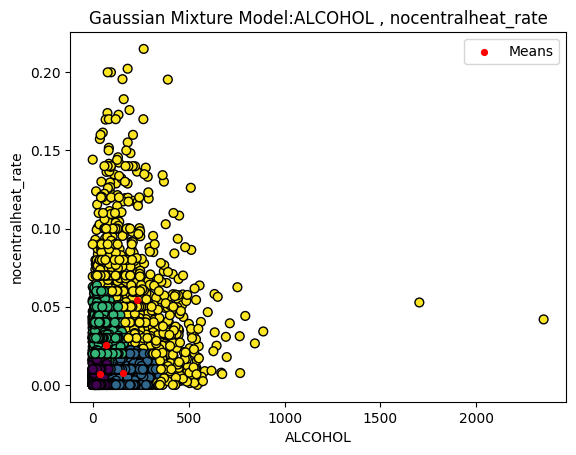

Gaussian Mixture Model Clustering: ALCOHOL Employment_rate
errors with: ALCOHOL Employment_rate
Gaussian Mixture Model Clustering: ALCOHOL Income_rate
errors with: ALCOHOL Income_rate
Gaussian Mixture Model Clustering: DRUG EMERG


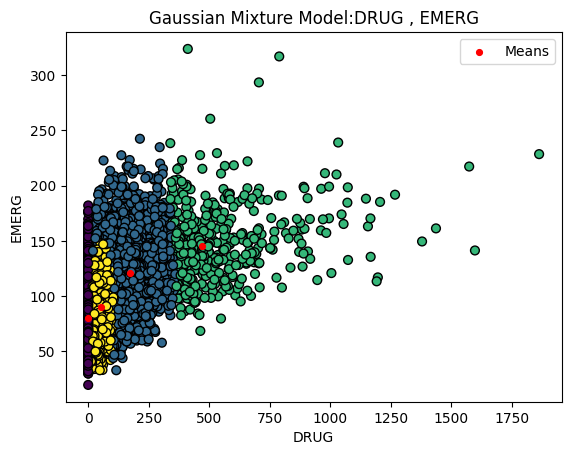

Gaussian Mixture Model Clustering: DRUG overcrowded_rate


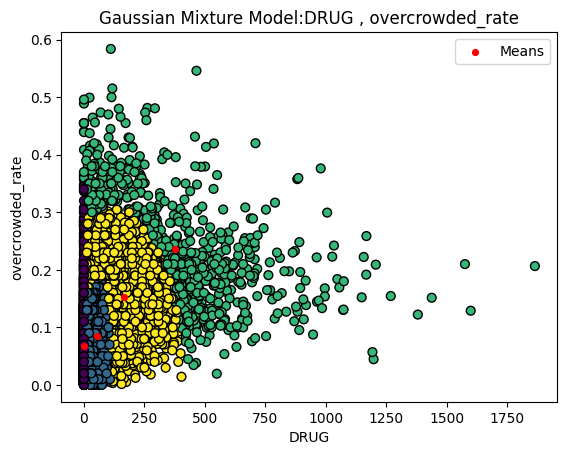

Gaussian Mixture Model Clustering: DRUG nocentralheat_rate


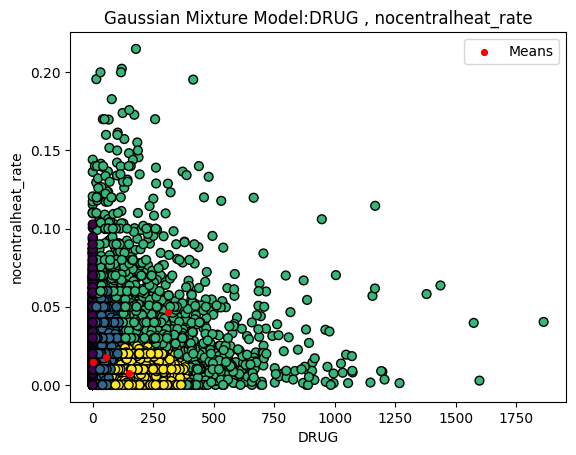

Gaussian Mixture Model Clustering: DRUG Employment_rate
errors with: DRUG Employment_rate
Gaussian Mixture Model Clustering: DRUG Income_rate
errors with: DRUG Income_rate
Gaussian Mixture Model Clustering: EMERG overcrowded_rate


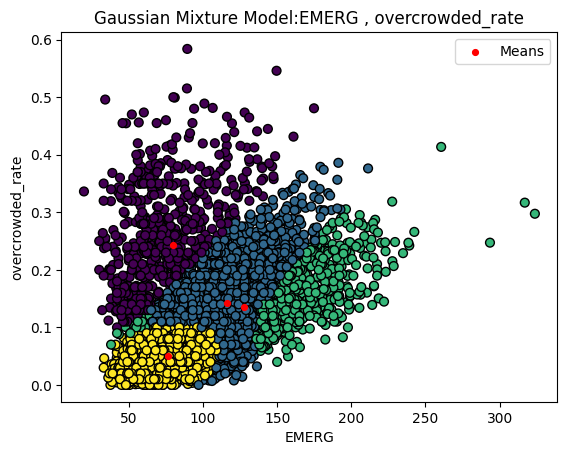

Gaussian Mixture Model Clustering: EMERG nocentralheat_rate


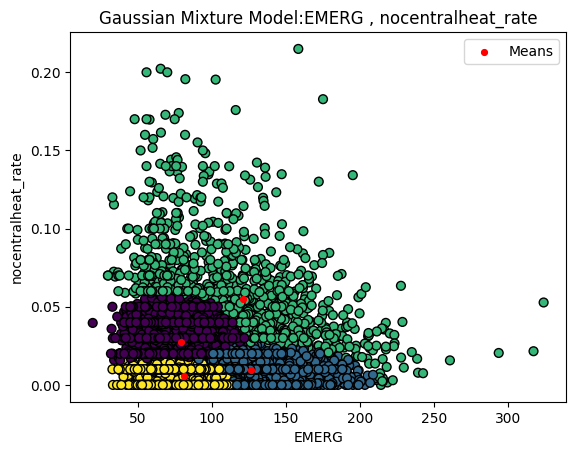

Gaussian Mixture Model Clustering: EMERG Employment_rate
errors with: EMERG Employment_rate
Gaussian Mixture Model Clustering: EMERG Income_rate
errors with: EMERG Income_rate
Gaussian Mixture Model Clustering: overcrowded_rate nocentralheat_rate


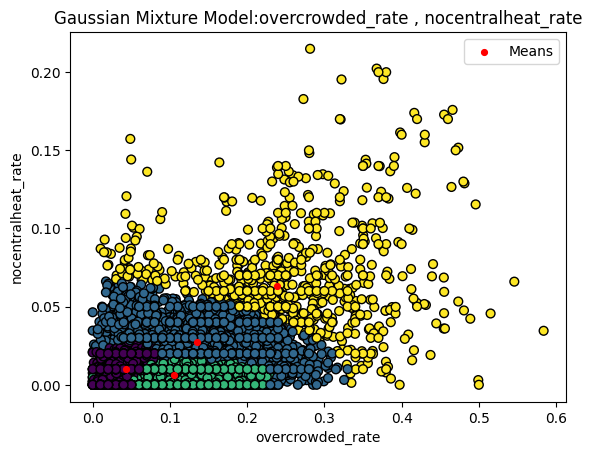

Gaussian Mixture Model Clustering: overcrowded_rate Employment_rate
errors with: overcrowded_rate Employment_rate
Gaussian Mixture Model Clustering: overcrowded_rate Income_rate
errors with: overcrowded_rate Income_rate
Gaussian Mixture Model Clustering: nocentralheat_rate Employment_rate
errors with: nocentralheat_rate Employment_rate
Gaussian Mixture Model Clustering: nocentralheat_rate Income_rate
errors with: nocentralheat_rate Income_rate
Gaussian Mixture Model Clustering: Employment_rate Income_rate
errors with: Employment_rate Income_rate


In [7]:

labellist_filtered=['ALCOHOL','DRUG','EMERG','overcrowded_rate','nocentralheat_rate','Employment_rate','Income_rate']
for i in range(0,len(labellist_filtered)-1):
    for j in range(i+1,len(labellist_filtered)):
        label1=labellist_filtered[i]
        label2=labellist_filtered[j]
        try:
            print('Gaussian Mixture Model Clustering:',label1,label2)
            X = dataset[[label1,label2]].values
            gmm = GaussianMixture(n_components=4, random_state=42)
            gmm.fit(X)
            labels = gmm.predict(X)
            
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='o')
            plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='.', s=40, linewidths=2, label='Means')
            plt.title('Gaussian Mixture Model:'+label1+" , "+label2)
            plt.xlabel(label1)
            plt.ylabel(label2)
            plt.legend()
            plt.show()
        except:
            print("errors with:",label1,label2)

In [8]:

label_pairs = combinations(labellist_filtered, 2)
for label1, label2 in label_pairs:
    try:
        data=dataset.copy()
        name='BIRCH Clustering:_'+ label1 +'_vs_' + label2
        print(name)
        X= data.copy()
        X = X[[label1, label2]]
        X=X.dropna()
        
        # Use BIRCH instead of DBSCAN
        birch = Birch(n_clusters=5).fit(X)
        labels = birch.labels_
        
        X['label'] = labels

        # Convert labels to string
        X['label'] = X['label'].astype(str)

        # Create a ColumnDataSource from df: source
        source = ColumnDataSource(X)

        # Create a palette with 'black' for noise and the rest of the colors for clusters
        palette = ['black'] + list(Category20[20])

        # Create a CategoricalColorMapper from the 'label' column: color_mapper
        color_mapper = CategoricalColorMapper(factors=X['label'].unique().tolist(), palette=palette)

        # show output in jupyter notebook
        output_notebook()

        # Create a figure with the "box_select" tool: p
        p = figure(title=name,x_axis_label=label1, y_axis_label=label2, tools='box_select')

        # Add a circle glyph to the figure p
        p.circle(x=label1, y=label2, source=source,
                 color=dict(field='label', transform=color_mapper),
                 legend_field='label')

        # Create_html_file() 
        # output_file(filename="./BIRCH_Clustering_Output/"+label1+'_'+label2+'.html')

        # Display the layout
        show(p)
    except Exception as e:
        print("Errors with labels :", label1, label2, "Error message:", str(e))
        break

BIRCH Clustering:_ALCOHOL_vs_DRUG


Loading BokehJS ...

BIRCH Clustering:_ALCOHOL_vs_EMERG


Loading BokehJS ...

BIRCH Clustering:_ALCOHOL_vs_overcrowded_rate


Loading BokehJS ...

BIRCH Clustering:_ALCOHOL_vs_nocentralheat_rate


Loading BokehJS ...

BIRCH Clustering:_ALCOHOL_vs_Employment_rate


Loading BokehJS ...

BIRCH Clustering:_ALCOHOL_vs_Income_rate


Loading BokehJS ...

BIRCH Clustering:_DRUG_vs_EMERG


Loading BokehJS ...

BIRCH Clustering:_DRUG_vs_overcrowded_rate


Loading BokehJS ...

BIRCH Clustering:_DRUG_vs_nocentralheat_rate


Loading BokehJS ...

BIRCH Clustering:_DRUG_vs_Employment_rate


Loading BokehJS ...

BIRCH Clustering:_DRUG_vs_Income_rate


Loading BokehJS ...

BIRCH Clustering:_EMERG_vs_overcrowded_rate


Loading BokehJS ...

BIRCH Clustering:_EMERG_vs_nocentralheat_rate


Loading BokehJS ...

BIRCH Clustering:_EMERG_vs_Employment_rate


Loading BokehJS ...

BIRCH Clustering:_EMERG_vs_Income_rate


Loading BokehJS ...

BIRCH Clustering:_overcrowded_rate_vs_nocentralheat_rate


Loading BokehJS ...

BIRCH Clustering:_overcrowded_rate_vs_Employment_rate


Loading BokehJS ...

BIRCH Clustering:_overcrowded_rate_vs_Income_rate


Loading BokehJS ...

BIRCH Clustering:_nocentralheat_rate_vs_Employment_rate


Loading BokehJS ...

BIRCH Clustering:_nocentralheat_rate_vs_Income_rate


Loading BokehJS ...

BIRCH Clustering:_Employment_rate_vs_Income_rate


Loading BokehJS ...

Error with: Total_population Income_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error with: Total_population Employment_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to

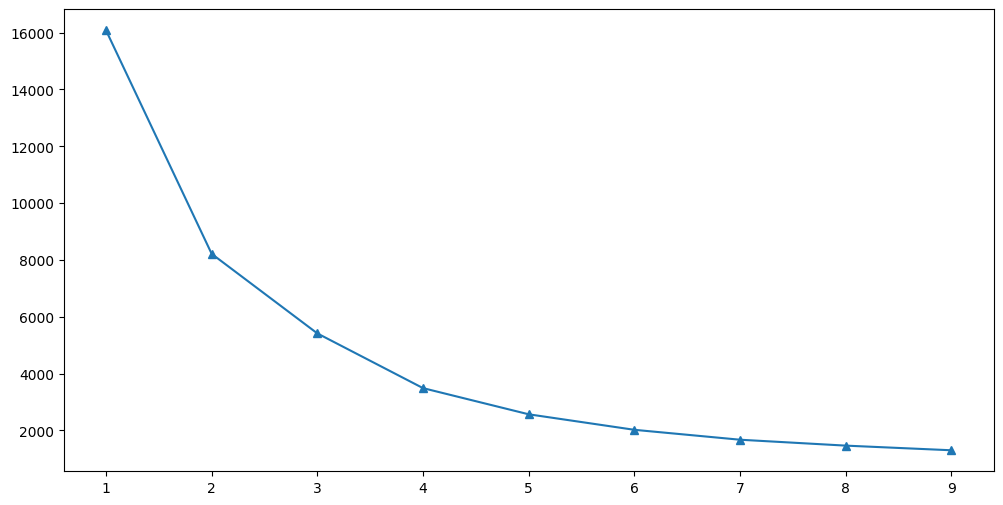

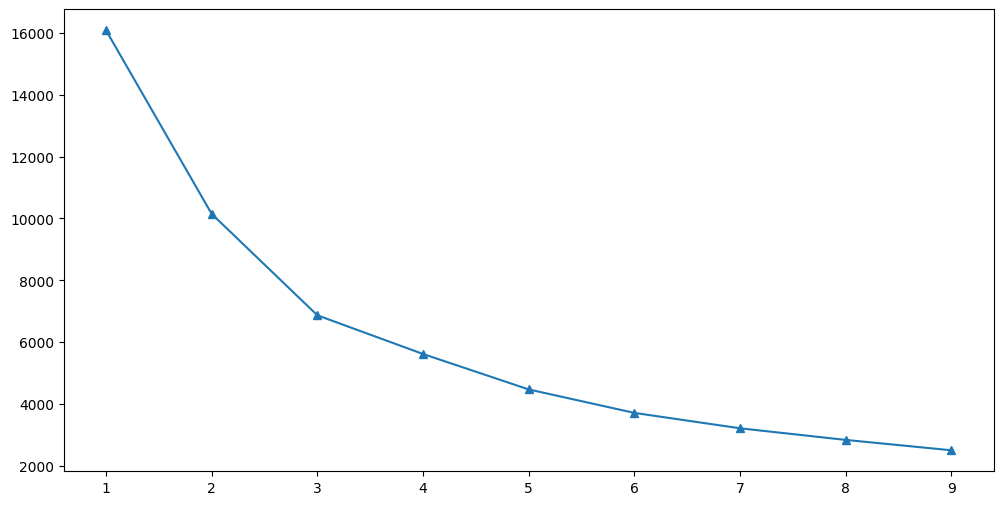

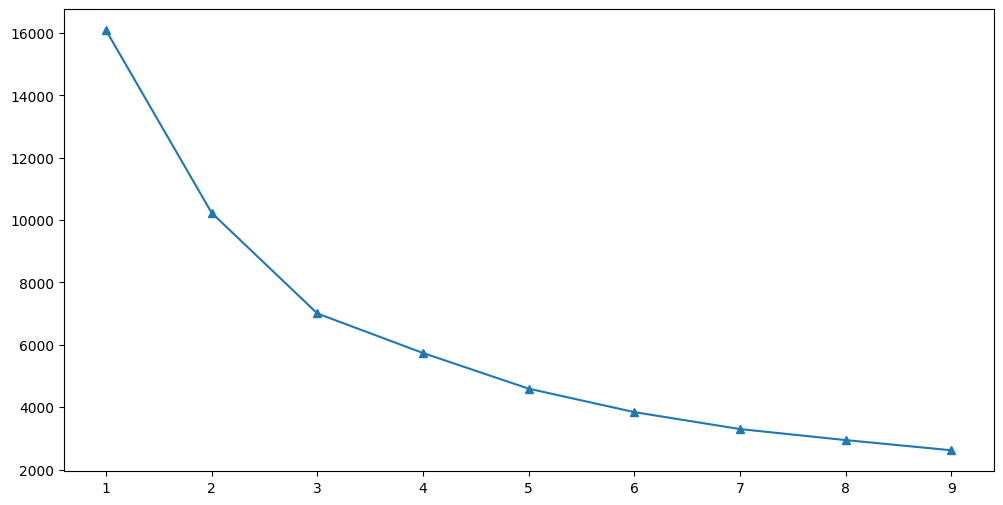

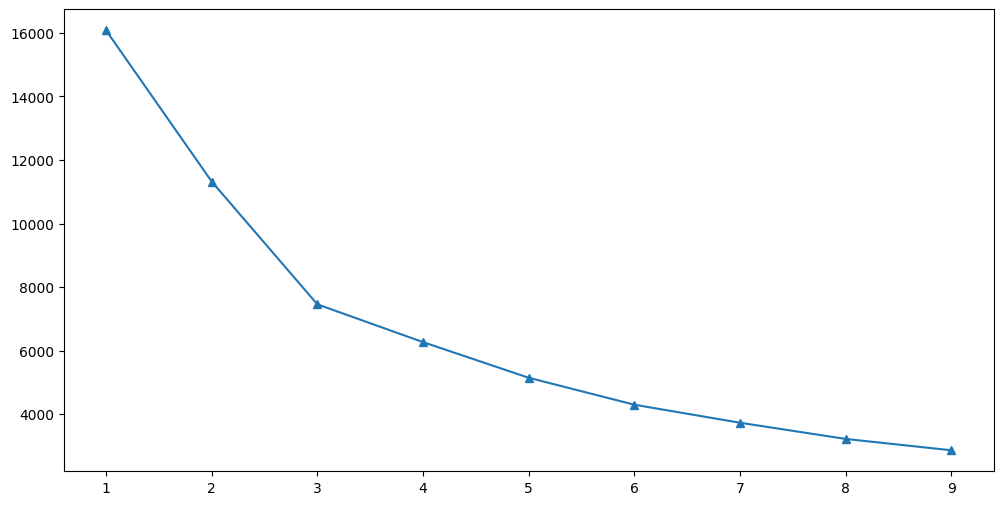

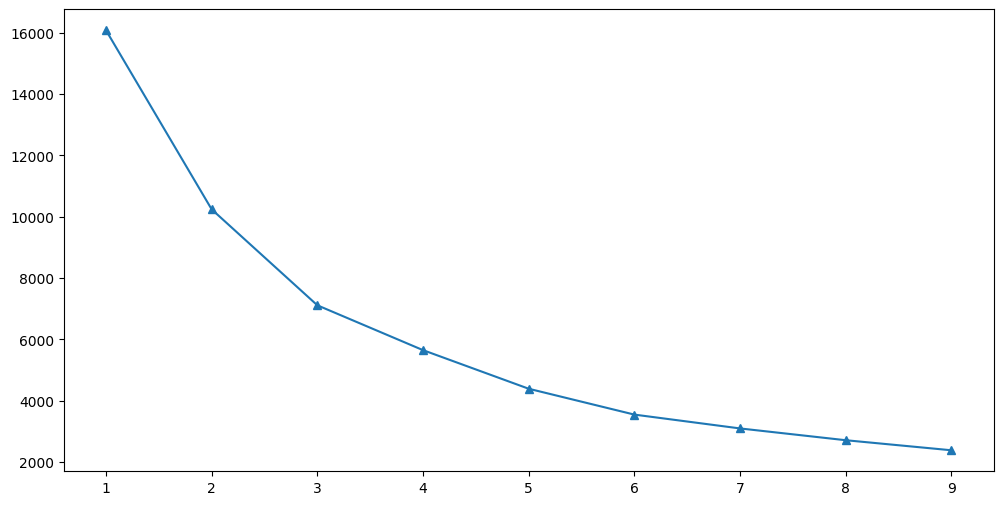

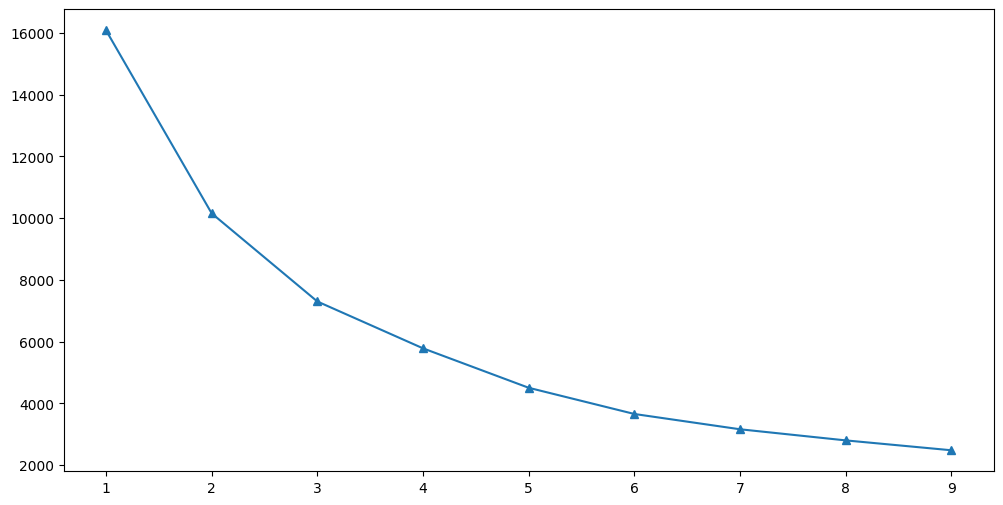

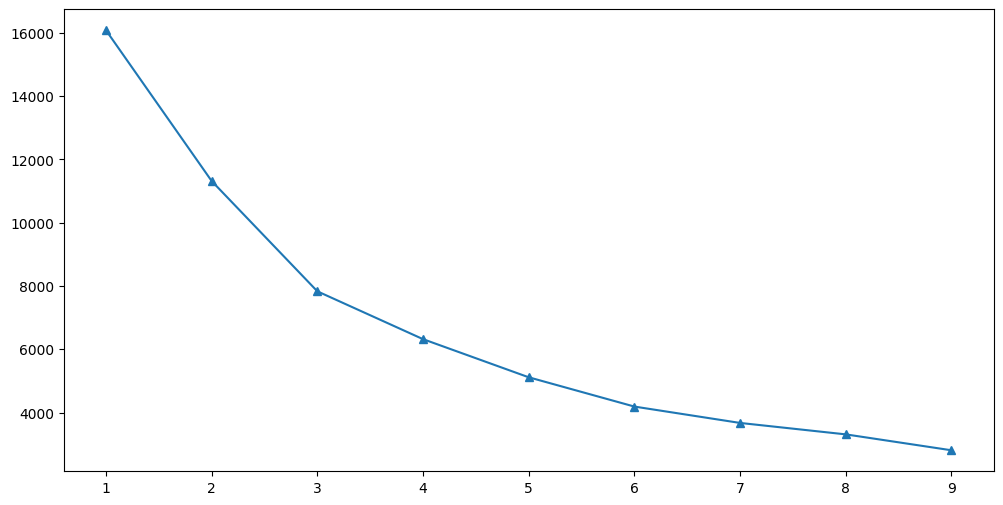

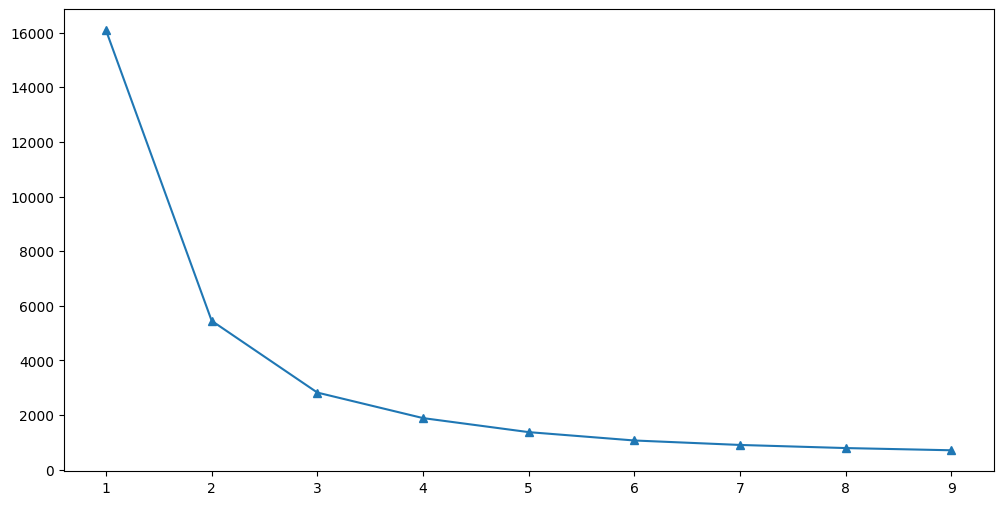

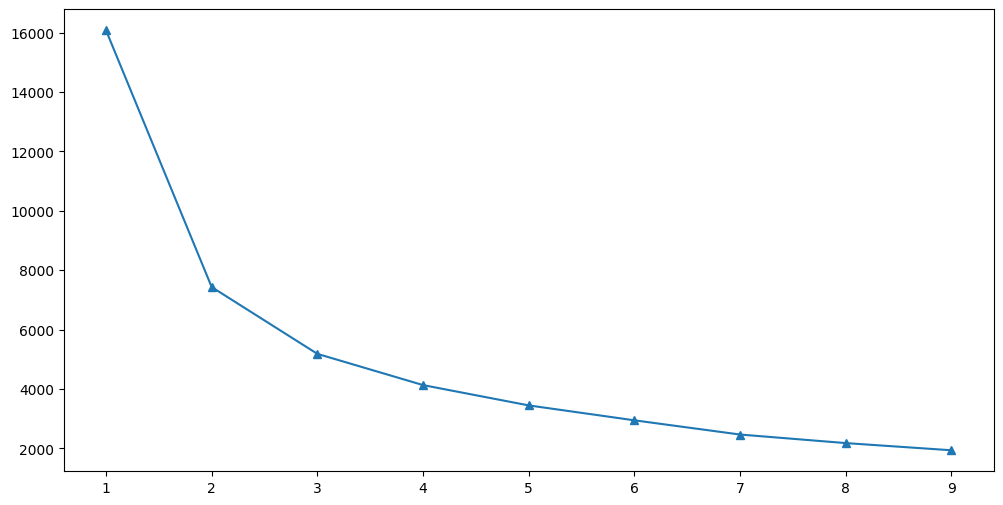

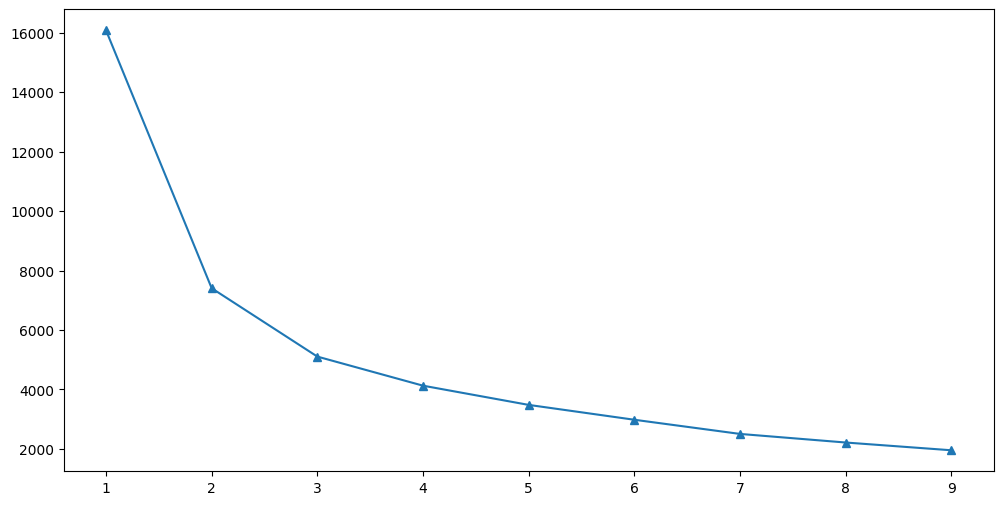

In [9]:
# Initialize lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
k=4
# Iterate through all pairs
for i in range(len(labellist_filtered) - 1):
    for j in range(i + 1, len(labellist_filtered)):
        label1 = labellist[i]
        label2 = labellist[j]
        try:
            df_scaled=dataset[[label1, label2]]
            df_scaled=df_scaled.apply(st.zscore)
            cluster_range=range(1,10)
            cluster_errors=[]
            for num_clusters in cluster_range:
                model=KMeans(num_clusters)
                model.fit(df_scaled)
                labels=model.labels_
                centroids=model.cluster_centers_
                cluster_errors.append(model.inertia_)
            
            clusters_df=pd.DataFrame({'num_clusters':cluster_range,'inertia':cluster_errors})
            
            clusters_df
            
            plt.figure(figsize=(12,6))
            plt.plot(clusters_df.num_clusters,clusters_df.inertia,marker='^')
        except Exception as ex:
            print("Error with:", label1, label2)
            print(str(ex))
            continue


K-Means Clustering: Total_population Working_age_population_revised


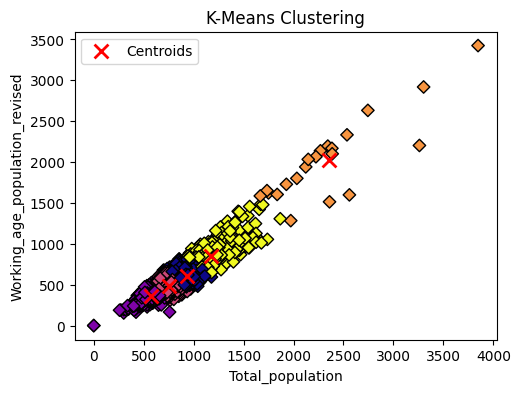

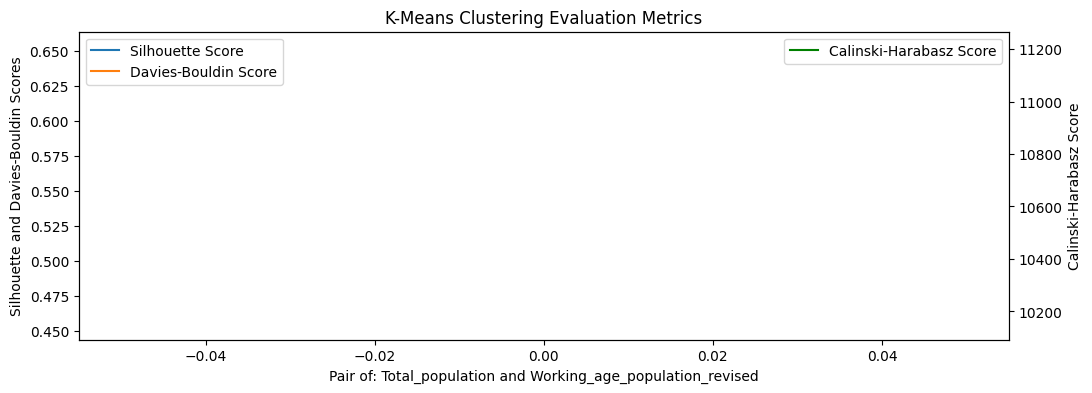

Best Silhouette Score: 0.4536480866909261 at pair = Total_population and Working_age_population_revised
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Total_population and Working_age_population_revised
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Total_population and Working_age_population_revised
K-Means Clustering: Total_population Income_rate
Error with: Total_population Income_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute

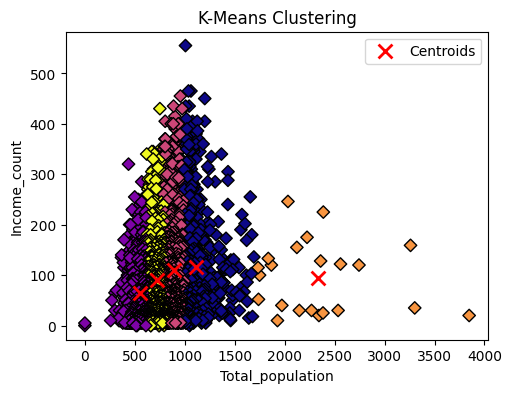

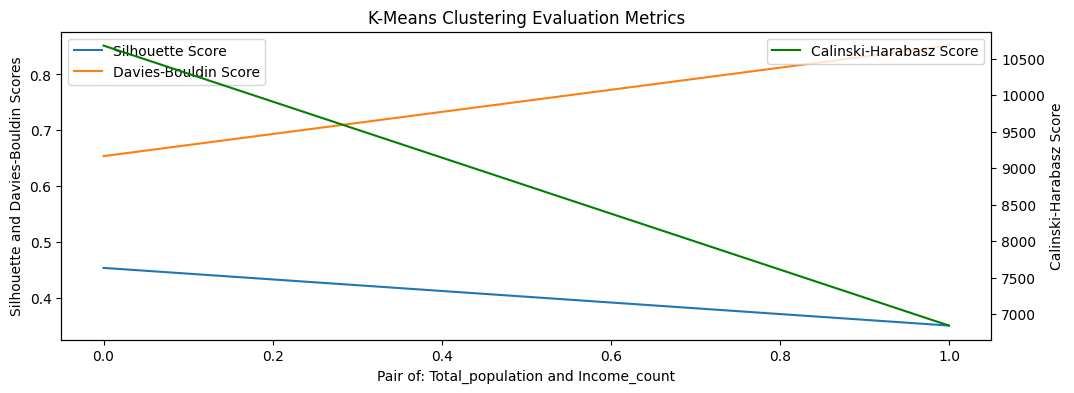

Best Silhouette Score: 0.4536480866909261 at pair = Total_population and Income_count
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Total_population and Income_count
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Total_population and Income_count
K-Means Clustering: Total_population Employment_rate
Error with: Total_population Employment_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
K-Mean

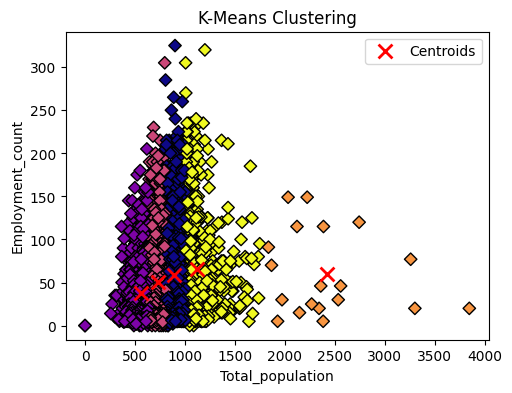

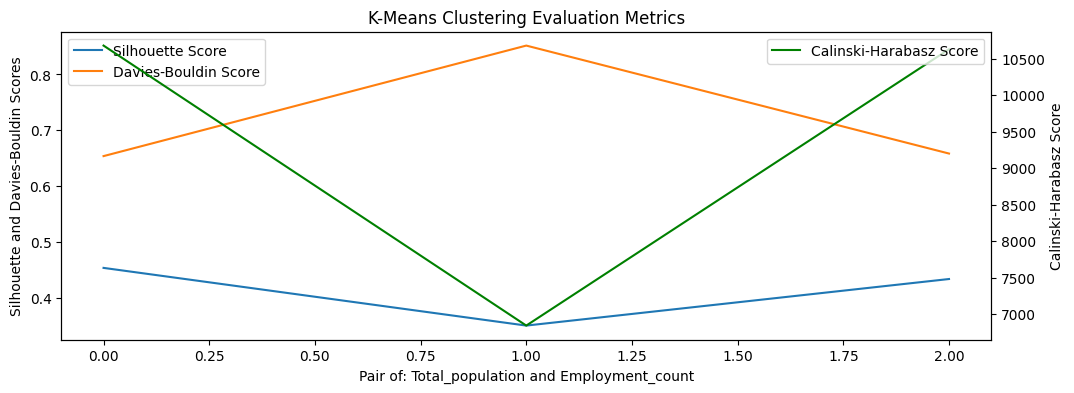

Best Silhouette Score: 0.4536480866909261 at pair = Total_population and Employment_count
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Total_population and Employment_count
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Total_population and Employment_count
K-Means Clustering: Total_population ALCOHOL


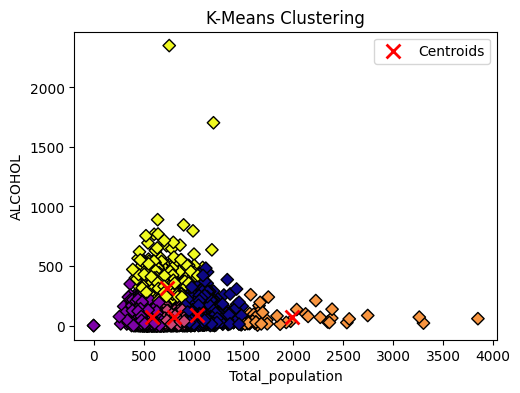

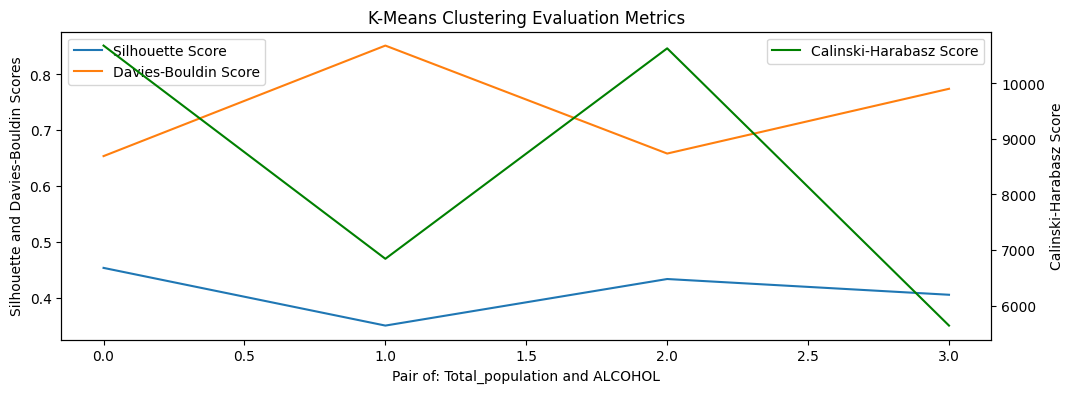

Best Silhouette Score: 0.4536480866909261 at pair = Total_population and ALCOHOL
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Total_population and ALCOHOL
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Total_population and ALCOHOL
K-Means Clustering: Working_age_population_revised Income_rate
Error with: Working_age_population_revised Income_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
K

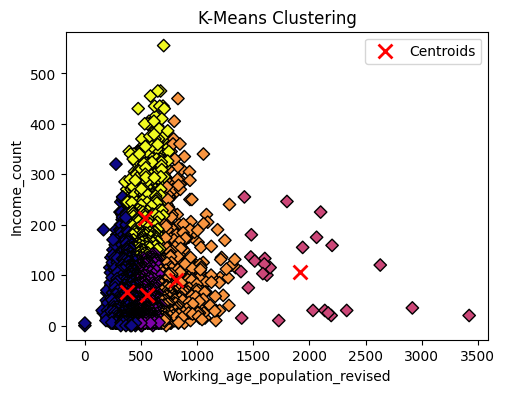

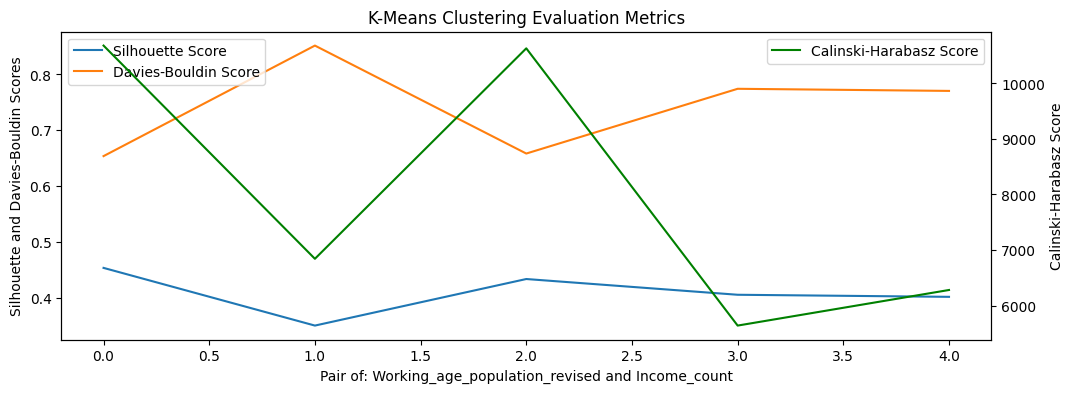

Best Silhouette Score: 0.4536480866909261 at pair = Working_age_population_revised and Income_count
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Working_age_population_revised and Income_count
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Working_age_population_revised and Income_count
K-Means Clustering: Working_age_population_revised Employment_rate
Error with: Working_age_population_revised Employment_rate
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.o

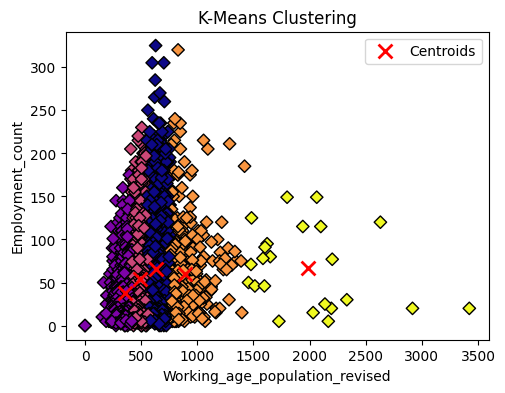

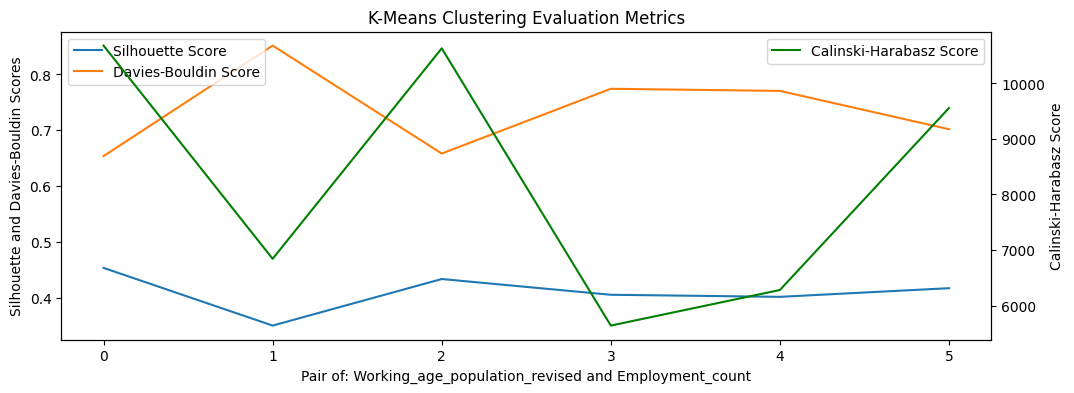

Best Silhouette Score: 0.4536480866909261 at pair = Working_age_population_revised and Employment_count
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Working_age_population_revised and Employment_count
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Working_age_population_revised and Employment_count
K-Means Clustering: Working_age_population_revised ALCOHOL


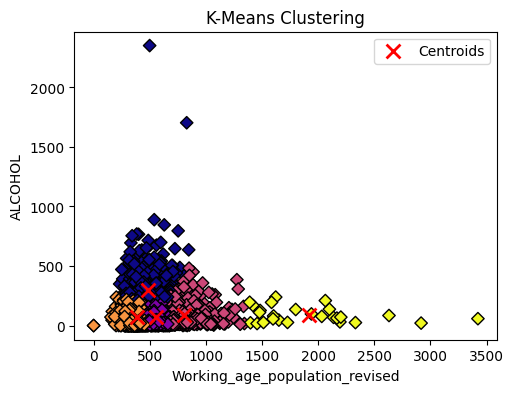

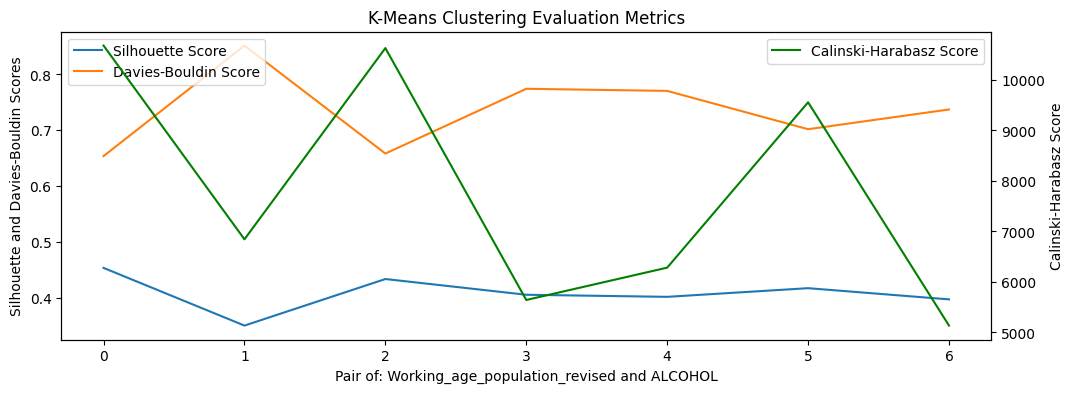

Best Silhouette Score: 0.4536480866909261 at pair = Working_age_population_revised and ALCOHOL
Best Davies-Bouldin Score: 0.6536263604623208 at pair = Working_age_population_revised and ALCOHOL
Best Calinski-Harabasz Score: 10679.4148844487 at pair = Working_age_population_revised and ALCOHOL
K-Means Clustering: Income_rate Income_count
Error with: Income_rate Income_count
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-va

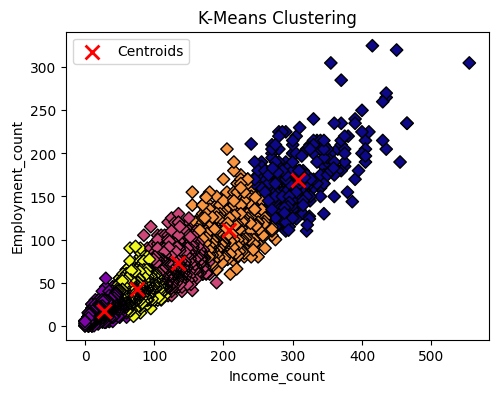

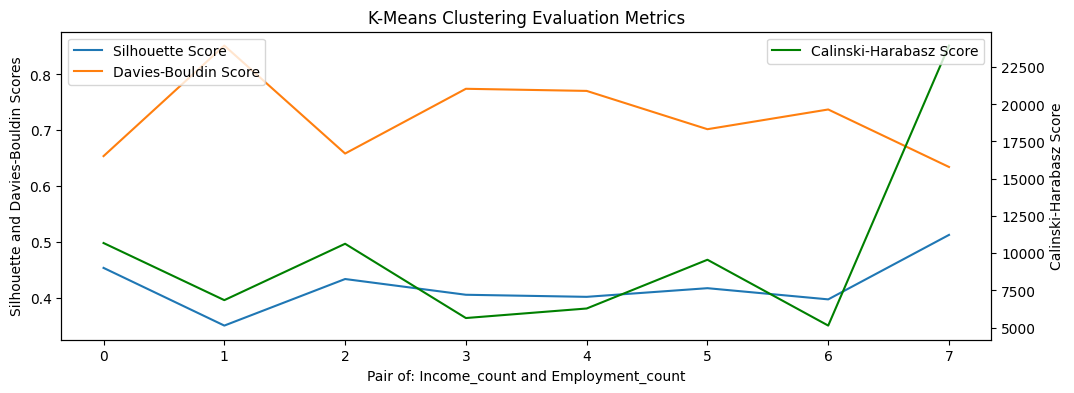

Best Silhouette Score: 0.5126668537150527 at pair = Income_count and Employment_count
Best Davies-Bouldin Score: 0.6341764919685484 at pair = Income_count and Employment_count
Best Calinski-Harabasz Score: 23942.716860132063 at pair = Income_count and Employment_count
K-Means Clustering: Income_count ALCOHOL


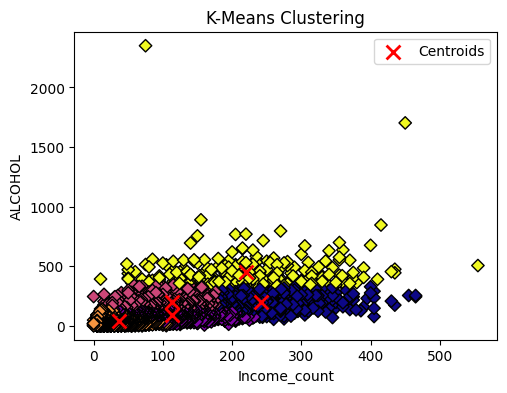

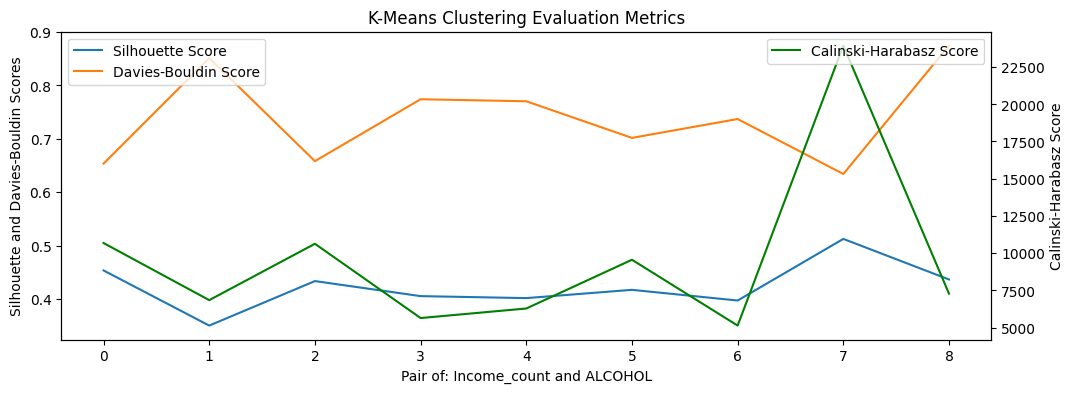

Best Silhouette Score: 0.5126668537150527 at pair = Income_count and ALCOHOL
Best Davies-Bouldin Score: 0.6341764919685484 at pair = Income_count and ALCOHOL
Best Calinski-Harabasz Score: 23942.716860132063 at pair = Income_count and ALCOHOL
K-Means Clustering: Employment_rate Employment_count
Error with: Employment_rate Employment_count
Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
K-Means Clustering: Employment_

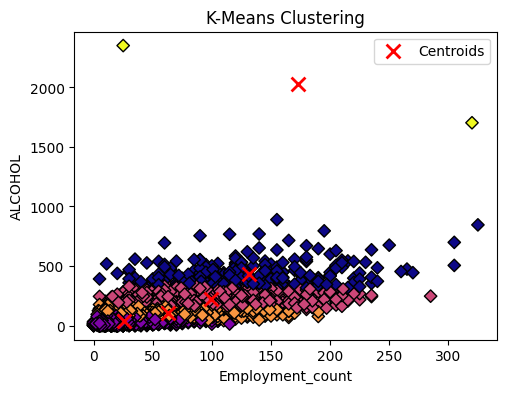

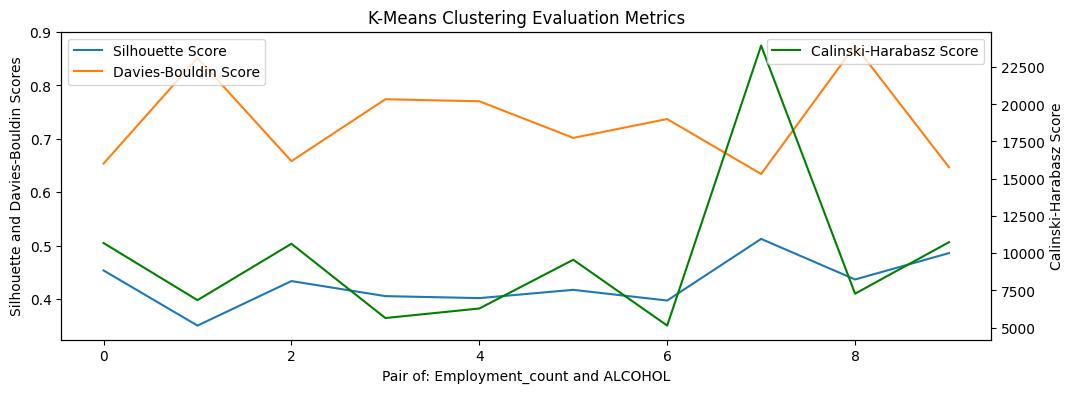

Best Silhouette Score: 0.5126668537150527 at pair = Employment_count and ALCOHOL
Best Davies-Bouldin Score: 0.6341764919685484 at pair = Employment_count and ALCOHOL
Best Calinski-Harabasz Score: 23942.716860132063 at pair = Employment_count and ALCOHOL


In [11]:
# Initialize lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
k=5
# Iterate through all pairs
for i in range(len(labellist_filtered) - 1):
    for j in range(i + 1, len(labellist_filtered)):
        label1 = labellist[i]
        label2 = labellist[j]
        try:
            
            X = dataset[[label1, label2]].values
            print('K-Means Clustering:', label1, label2)

            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X)
            labels = kmeans.labels_
            centroids = kmeans.cluster_centers_

            # Compute and store evaluation metrics
            silhouette = silhouette_score(X, labels)
            davies_bouldin = davies_bouldin_score(X, labels)
            calinski_harabasz = calinski_harabasz_score(X, labels)
            silhouette_scores.append(silhouette)
            davies_bouldin_scores.append(davies_bouldin)
            calinski_harabasz_scores.append(calinski_harabasz)

            # Visualize the clustering with centroids
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=40, edgecolors='k', marker='D')
            plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, linewidths=2, label='Centroids')
            plt.title('K-Means Clustering')
            plt.xlabel(label1)
            plt.ylabel(label2)
            plt.legend()

            # Plot the scores with twin y-axis for better visibility
            fig, ax1 = plt.subplots(figsize=(12, 4))
            ax1.plot(silhouette_scores, label='Silhouette Score')
            ax1.plot(davies_bouldin_scores, label='Davies-Bouldin Score')
            ax1.set_xlabel(f"Pair of: {label1} and {label2}")
            ax1.set_ylabel('Silhouette and Davies-Bouldin Scores')
            ax1.legend(loc="upper left")

            ax2 = ax1.twinx()
            ax2.plot(calinski_harabasz_scores, label='Calinski-Harabasz Score', color='g')
            ax2.set_ylabel('Calinski-Harabasz Score')
            ax2.legend(loc="upper right")

            plt.title('K-Means Clustering Evaluation Metrics')
            plt.show()

            # Display the best scores for the current pair of features
            best_silhouette_score = max(silhouette_scores)
            best_davies_bouldin_score = min(davies_bouldin_scores)
            best_calinski_harabasz_score = max(calinski_harabasz_scores)

            print("Best Silhouette Score:", best_silhouette_score, "at pair =", label1, "and", label2)
            print("Best Davies-Bouldin Score:", best_davies_bouldin_score, "at pair =", label1, "and", label2)
            print("Best Calinski-Harabasz Score:", best_calinski_harabasz_score, "at pair =", label1, "and", label2)

        except Exception as ex:
            print("Error with:", label1, label2)
            print(str(ex))
            continue
